<a href="https://colab.research.google.com/github/alexhosp/amazon-sentiment-analysis/blob/main/amazon_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
The client aims to understand the overall sentiment expressed in customer reviess to better understand how their products are preceived in the market.

## Main Question
Can you tell me whether most of my reviews are positive or negative?

## Input Data
* A subset of Amazon product review data, with ratings and reviews. * Focus on one product category.
* Work with a subset of a maximum of 5,000 reviews.

### Data Features
* The dataset includes 4915 entries.
* The dataset has 10 columns, of which two are of interest for sentiment analysis:
  1. `reviewText`: Text of the customer review. This serves as the input for the pre-trained model.
  2. `overall`: Rating score from 1 to 5. These scores could be used to derive labels for model training purposes.

## Tasks:
1. Preprocess data and prepare it for use with the DistilBERT model.
2. Perform EDA and explore distribution of reviews (1 -5).
3. Use the pre-trained DistilBERT from HuggingFace through Pytorch to predict sentiment for all entries of the dataset.
4. Analyze the results and calculate overall sentiment.
5. Sum up the findings in a concise and clear report.
6. Complete the project in an optimimum of less than 14 hours and a maximum of 33.5 hours. The only deliverable is a report.

### 1. Environment Setup
* Install and import necessary libraries.
* Upload the dataset.

In [ ]:
# Import libraries for preprocessing  and prediction
import pandas as pd
import numpy as np
import torch

In [ ]:
# Install Kaggle to upload the public dataset
%pip install -qU kaggle

In [ ]:
# Create a directory to store kaggle.json
%mkdir ~/.config/kaggle

mkdir: cannot create directory ‘/root/.config/kaggle’: File exists


In [ ]:
# Copy the file into that directory
%cp kaggle.json ~/.config/kaggle/

In [ ]:
%ls ~/.config/kaggle

kaggle.json


In [ ]:
# Import Kaggle
import kaggle

In [ ]:
# Import libraries for EDA
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [ ]:
# Install necessary libraries for prediction
%pip install -qU transformers tqdm boto3 requests regex sentencepiece sacremoses

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 118.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 8.1 MB/s eta 0:00:00


In [ ]:
# Import model and tokenizer for the model
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

In [ ]:
# Download the dataset from Kaggle
!kaggle datasets download -d tarkkaanko/amazon

Dataset URL: https://www.kaggle.com/datasets/tarkkaanko/amazon
License(s): CC-BY-NC-SA-4.0
100% 582k/582k [00:00<00:00, 728kB/s]
100% 582k/582k [00:00<00:00, 728kB/s]


In [ ]:
!ls

amazon.zip  kaggle  kaggle.json  sample_data


In [ ]:
# Unzip the dataset
import zipfile
with zipfile.ZipFile('amazon.zip', 'r') as zip_ref:
    zip_ref.extractall('amazon_reviews')

In [ ]:
!ls

amazon_reviews	amazon.zip  kaggle  kaggle.json  sample_data


In [ ]:
!ls amazon_reviews

amazon_reviews.csv


In [ ]:
# Upload data as a pandas dataframe
df = pd.read_csv('amazon_reviews/amazon_reviews.csv')
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


### 2. EDA
* Explore and clean the dataset to understand datastructure and identify quality issues.
* Exlplore distribution of reviews by score.
* Visualize distribution by score.

**Clean Text Data**

In [ ]:
# Check which distinct rating scores are available
df['overall'].unique()

array([4., 5., 3., 1., 2.])

In [ ]:
# Remove irrelevant columns
df = df[['reviewText', 'overall']]
df.head()

,reviewText,overall
0,No issues.,4.0
1,"Purchased this for my device, it worked as adv...",5.0
2,it works as expected. I should have sprung for...,4.0
3,This think has worked out great.Had a diff. br...,5.0
4,"Bought it with Retail Packaging, arrived legit...",5.0


In [ ]:
# Check for missing reviewText
df[df['reviewText'].isnull()]

,reviewText,overall
125,NaN,5.0


In [ ]:
# Remove the row
df = df.dropna(subset=['reviewText'])

In [ ]:
# Verify that no missing values remain in 'reviewText'
df['reviewText'].isnull().sum()

0

In [ ]:
# Check the distribution of review lenghts, DistilBERT can deal with up to 512 characters
df['reviewText'].apply(lambda x: len(x.split())).describe()

,reviewText
count,4914.000000
mean,50.452584
std,59.116494
min,1.000000
25%,23.000000
50%,33.000000
75%,55.000000
max,1554.000000


In [ ]:
# Check for duplicates
df['reviewText'].duplicated().sum()

2

In [ ]:
# Remove duplicates
df = df.drop_duplicates(subset=['reviewText'])

# Check for duplicates
df['reviewText'].duplicated().sum()

0

In [ ]:
# Check for special characters in text - HTML might confuse the model
import re

def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    return text

df['reviewText'] = df['reviewText'].apply(clean_text)


In [ ]:
df.head()

,reviewText,overall
0,No issues.,4.0
1,"Purchased this for my device, it worked as adv...",5.0
2,it works as expected. I should have sprung for...,4.0
3,This think has worked out great.Had a diff. br...,5.0
4,"Bought it with Retail Packaging, arrived legit...",5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4912 entries, 0 to 4914
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reviewText  4912 non-null   object 
 1   overall     4912 non-null   float64
dtypes: float64(1), object(1)
memory usage: 115.1+ KB


**Visualize Distribution of Numerical Reviews**
* Use a histogram to visualize count of reviews per score.

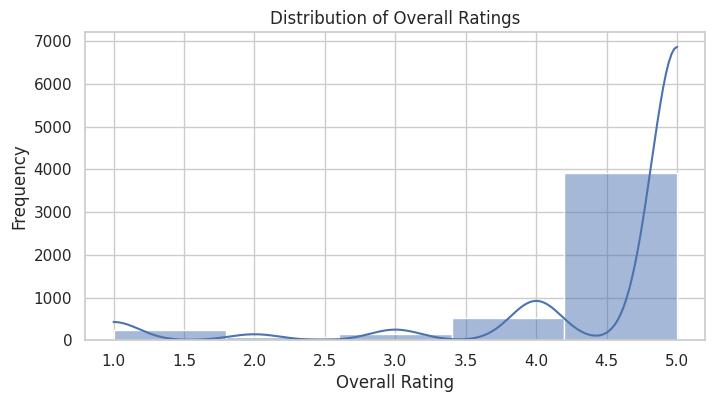

In [ ]:
# Set the style of seaborn plots
sns.set(style="whitegrid")

# Plot the distribution of 'overall' ratings
plt.figure(figsize=(8, 4))
sns.histplot(df['overall'], bins=5, kde=True)

# Set labels and title
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Ratings')
plt.show()

### 3. Define the Model and Tokenizer
* Load the pre-trained transformer model.
* Load the pre-trained tokenizer to prepare data for the model.


**Load the Pre-trained Model**
* This is a snapshot of a model that is fine-tuned for binary sentence classification.

In [ ]:
# Define a fine-tuned version of DistilBERT as the model for inference
model_name = 'distilbert/distilbert-base-uncased-finetuned-sst-2-english'

In [ ]:
# Load the fine-tuned DistilBERT model for sentence classification
model = DistilBertForSequenceClassification.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

**Move the Model to the GPU**

In [ ]:
# Check if GPU is available
if torch.cuda.is_available():
    print("GPU is available")
    print(f"Device name: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is NOT available")

GPU is available
Device name: Tesla T4


In [ ]:
# Define the device as GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# Load the model to GPU - all model calls will be exectuted on the GPU
model.to(device)

# Set the model to inference (evaluation) mode for accurate prediction results
model.eval()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


**Load the Pre-trained Tokenizer**
* This is a model converting input text-data into a tensor representation that the model can work with.

In [ ]:
# Load the pre-trained tokenizer for DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

### 4. Split Data into Batches
* This improves efficiency of processing and reduces memory usage.
* Since the model data (here huge) and the input data need to fit on the GPU during inference, the input data needs to be split into batches.
* This fits only some data rather than all on memory at a time.

In [ ]:
# Convert text column of dataframe into a list of texts
reviews = df['reviewText'].tolist()

In [ ]:
# Define batch size
batch_size = 32 # Start with a small batch size

In [ ]:
num_batches = len(reviews) // batch_size + (1 if len(reviews) % batch_size != 0 else 0)
num_batches

154

### 5. Tokenize and Process Data in Batches
* Tokenize data in batches.
* Move the tokenized batches to the GPU.
* Pass the tokenized input tensors to the model for inference.
* Store the raw prediction output and apply a normalization.
* Store thefinal predictions.

In [ ]:
# Set up logging
import logging
logging.basicConfig(level=logging.INFO, force=True)

# Test if logging works in the notebook
logging.info("Logging test")

INFO:root:Logging test


In [ ]:
# Initialize list to store predictions in
all_predictions = []

# Loop over each batch of the reviews
for batch in range(num_batches):
  # Get the current batch
  start_idx = batch * batch_size
  end_idx = (batch + 1) * batch_size
  batch_reviews = reviews[start_idx:end_idx]

  # Log the current batch index and size
  logging.info(f"Processing batch {batch + 1}/{num_batches}, Number of reviews in this batch: {len(batch_reviews)}")

  # Check if the batch is empty
  if len(batch_reviews) == 0:
      logging.warning(f"Skipping empty batch {batch + 1}")
      continue

  # Tokenize the current batch
  try:
      tokenized_data = tokenizer(
          batch_reviews,  # Pass only the current batch to the tokenizer
          padding=True,  # Add padding tokens to short texts
          truncation=True,
          return_tensors='pt'  # Return PyTorch tensors
      )
  except Exception as e:
      logging.error(f"Error during tokenization: {e}")
      continue  # Skip the current batch if an error occurs
  # Move tokenized data to the GPU
  input_ids = tokenized_data['input_ids'].to(device)
  attention_mask = tokenized_data['attention_mask'].to(device)

  # Log the shape of the input tensors
  logging.info(f"Batch {batch + 1}: Input IDs shape: {input_ids.shape}, Attention Mask shape: {attention_mask.shape}")

  # Perform inference with the model
  with torch.no_grad():  # Disable gradients for inference (saves memory)
      outputs = model(input_ids=input_ids, attention_mask=attention_mask)
      logits = outputs.logits # Raw model outputs

  # Apply the argmax function to return the class with the highest value
  predicted_classes = torch.argmax(logits, dim=1)

  # Move the predicted classes to the CPU to save GPU memory
  predicted_classes = predicted_classes.cpu().numpy()

  # Append the predictions for this batch to the overall list
  all_predictions.extend(predicted_classes)

# Log after processing all batches
logging.info("All batches processed successfully.")


INFO:root:Processing batch 1/154, Number of reviews in this batch: 32
INFO:root:Batch 1: Input IDs shape: torch.Size([32, 290]), Attention Mask shape: torch.Size([32, 290])
INFO:root:Processing batch 2/154, Number of reviews in this batch: 32
INFO:root:Batch 2: Input IDs shape: torch.Size([32, 241]), Attention Mask shape: torch.Size([32, 241])
INFO:root:Processing batch 3/154, Number of reviews in this batch: 32
INFO:root:Batch 3: Input IDs shape: torch.Size([32, 512]), Attention Mask shape: torch.Size([32, 512])
INFO:root:Processing batch 4/154, Number of reviews in this batch: 32
INFO:root:Batch 4: Input IDs shape: torch.Size([32, 512]), Attention Mask shape: torch.Size([32, 512])
INFO:root:Processing batch 5/154, Number of reviews in this batch: 32
INFO:root:Batch 5: Input IDs shape: torch.Size([32, 216]), Attention Mask shape: torch.Size([32, 216])
INFO:root:Processing batch 6/154, Number of reviews in this batch: 32
INFO:root:Batch 6: Input IDs shape: torch.Size([32, 344]), Attent

In [ ]:
# Display the first 10 predictions
all_predictions[:10]

[1, 1, 0, 1, 1, 1, 1, 1, 0, 1]

In [ ]:
# Return number of reviews in the original dataset
len(df)

4912

In [ ]:
# Return the number of predictions
len(all_predictions)

4912

### 6. Map Predictions to Labels
* Map 1 to 'Positive'.
* Map 0 to 'Negative'.
* Add the predicted values as a new column to the dataframe.

In [ ]:
# Define the mapping as a dictionary
label_mapping = {0: 'Negative', 1: 'Positive'}

In [ ]:
# Map each prediction in the model output to a label - returns a list of labels
predicted_labels = [label_mapping[prediction] for prediction in all_predictions]

In [ ]:
# Display the fist 10 labels
predicted_labels[:10]

['Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive']

In [ ]:
# Set option to display the full text in DataFrame columns
pd.set_option('display.max_colwidth', 50)

In [ ]:
# Add the predicted labels to the input dataframe
df['Predicted_Sentiment'] = predicted_labels
df.head()

,reviewText,overall,Predicted_Sentiment
0,No issues.,4.0,Positive
1,"Purchased this for my device, it worked as adv...",5.0,Positive
2,it works as expected. I should have sprung for...,4.0,Negative
3,This think has worked out great.Had a diff. br...,5.0,Positive
4,"Bought it with Retail Packaging, arrived legit...",5.0,Positive


In [ ]:
# Store dataset with labels
df.to_csv('amazon_reviews_with_sentiment_labels.csv', index=False)

### 7. Answer the Question with Prediction Results
* **Question**: 'Can you tell me whether most of my reviews are positive or negative?'
* Find the answer to this question by calculating the percentage of positive and negative results. The higher percentage will be the answer.

In [ ]:
# Count total reviews
total_reviews = len(df)

# Count positive reviews
positive_reviews = df['Predicted_Sentiment'].value_counts().get('Positive', 0)

# Count negative reviews
negative_reviews = df['Predicted_Sentiment'].value_counts().get('Negative', 0)

In [ ]:
# Calculate the percentage of positive reviews
positive_percentage = int(((positive_reviews / total_reviews) * 100))
print(f"{positive_percentage}% of reviews are positive.")

68% of reviews are positive.


In [ ]:
# Calculate the percentage of negative reviews
negative_percentage = 100 - positive_percentage
print(f"{negative_percentage}% of reviews are negative.")

32% of reviews are negative.


**Answer**:

My sentiment analysis of your reviews shows, that they are mostly positive. 68% of your reviews are positive and 32% are negative. Further plotting the distribution of your ratings confirms that most of your reviews were 4 to 5 start ratings.

The visualizations below show my results of analyzing your star ratings and text-reviews:

**Distribution of Star Ratings**
* Almost 80% of star-ratings are 5 star ratings.
* 11% are 4-star ratings, making them the second most common.
* The next most common are 1-star ratings and there are almost no 2-star and 3-star ratings in the dataset.
* Overall 5-star ratings are by far the most common.

In [ ]:
# Display the total count of ratings
len(df)

4912

In [ ]:
# Show unique ratings
df['overall'].unique()

array([4., 5., 3., 1., 2.])

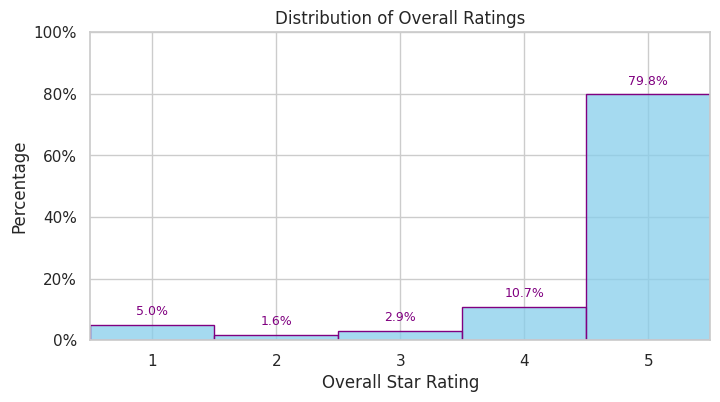

In [ ]:
# Set the style of seaborn plots
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(8, 4))

# Define custom bin edges to align with integer ratings (1 to 5)
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

# Plot the distribution of 'overall' ratings with percentages on the y-axis
ax = sns.histplot(
    df['overall'],          # The data to plot (assuming integer ratings from 1 to 5)
    bins=bins,              # Custom bin edges for integer alignment
    stat='percent',         # Normalize y-axis to show percentages
    color='skyblue',        # Set bar color
    edgecolor='purple'       # Add black edges to bars for clarity
)

# Set x-axis ticks as whole numbers from 1 to 5
plt.xticks([1, 2, 3, 4, 5])

# Set x-axis limits to start at 0.5 and end at 5.5 to fully display all bins
plt.xlim(0.5, 5.5)

# Set y-axis limits from 0% to 100%
plt.ylim(0, 100)

# Set labels and title
plt.xlabel('Overall Star Rating')
plt.ylabel('Percentage')
plt.title('Distribution of Overall Ratings')

# Format y-axis to include percentage signs
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    fontsize=9, color='purple', xytext=(0, 5),
                    textcoords='offset points')

# Export the plot in high definition
plt.savefig('star_rating_distribution.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()

**Distribution of Sentiment Labels**
* More than 68% of the reviews reflect a positive sentiment, while 32% are classified as negative.
* This indicates that the majority of reviews were clearly positive, though 32% included some negative aspects, even within generally positive reviews.
* Given that a binary classification model was used, subtle nuances in sentiment may not have been fully captured.

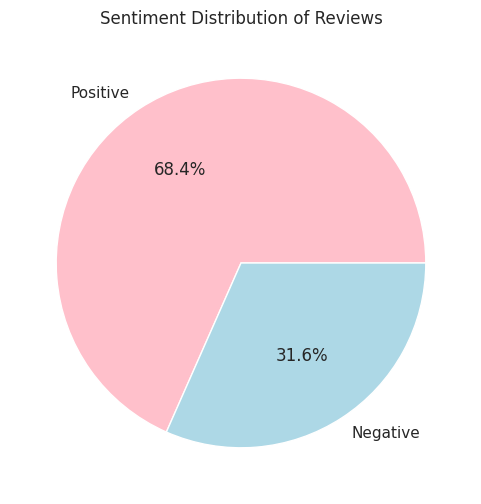

In [ ]:
# Create a pie chart to show distribution of Negative and Positive Reviews
sentiment_counts = df['Predicted_Sentiment'].value_counts()
plt.figure(figsize=(6,6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'lightblue'])
plt.title('Sentiment Distribution of Reviews')
plt.ylabel('')  # Hide the y-label

# Export the chart in high definition
plt.savefig('sentiment_distribution.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()